<a href="https://colab.research.google.com/github/NavyaNanduri/Enhanced-Default-Risk-Prediction-Using-Altman-s-Z-Score-and-Market-Indicators/blob/main/Adv_fin_defaultmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1 - Import libraries and tickers

In [ ]:
!pip install yfinance --quiet
import yfinance as yf
import pandas as pd
import numpy as np
import time

# Helper: get the latest value from a Series
def latest(series):
    return series.iloc[0] if isinstance(series, pd.Series) and not series.empty else 0

# Flexible field retriever
def get_first_available(index_list, df):
    for key in index_list:
        if key in df.index:
            return df.loc[key]
    return None

# Main data collection function with label fallback
def fetch_financial_data(ticker):
    stock = yf.Ticker(ticker)
    try:
        hist = stock.history(period='1y')
        stock_return = ((hist['Close'][-1] - hist['Close'][0]) / hist['Close'][0]) * 100
        volatility = hist['Close'].pct_change().std() * np.sqrt(252) * 100

        # Balance sheet fallback
        bs = stock.balance_sheet
        if bs.empty or "Current Assets" not in bs.index:
            bs = stock.quarterly_balance_sheet

        current_assets = get_first_available(["Total Current Assets", "Current Assets"], bs)
        current_liabilities = get_first_available(["Total Current Liabilities", "Current Liabilities"], bs)
        total_liabilities = get_first_available(["Total Liab", "Total Liabilities", "Total Liabilities Net Minority Interest"], bs)
        working_capital = current_assets - current_liabilities if current_assets is not None and current_liabilities is not None else None
        total_assets = get_first_available(["Total Assets"], bs)
        retained_earnings = get_first_available(["Retained Earnings"], bs)

        # Income
        fs = stock.financials
        if fs.empty or "Operating Income" not in fs.index:
            fs = stock.quarterly_financials
        ebit = get_first_available(["Operating Income", "EBIT"], fs)
        revenue = get_first_available(["Total Revenue", "Revenue"], fs)

        # Cash flow
        cf = stock.cashflow
        if cf.empty:
            cf = stock.quarterly_cashflow
        cashflow = get_first_available([
            "Total Cash From Operating Activities",
            "Operating Cash Flow",
            "Cash From Operations"
        ], cf)

        info = stock.info
        market_cap = info.get("marketCap")

        return {
            'Ticker': ticker,
            'Market Cap': market_cap or 0,
            'Total Assets': latest(total_assets),
            'Total Liabilities': latest(total_liabilities),
            'Current Assets': latest(current_assets),
            'Current Liabilities': latest(current_liabilities),
            'Working Capital': latest(working_capital),
            'Retained Earnings': latest(retained_earnings),
            'Revenue': latest(revenue),
            'EBIT': latest(ebit),
            'Cash Flow': latest(cashflow),
            'Stock Return (%)': round(stock_return, 2),
            'Volatility (%)': round(volatility, 2)
        }

    except Exception as e:
        return {'Ticker': ticker, 'Error': str(e)}


# Step 2 - Ticker initalization

In [ ]:
tickers = [
    'CAT', 'DE', 'PWR', 'FLR', 'ACM', 'J', 'KBR', 'MYRG', 'STRL', 'ROAD',
    'MTZ', 'FIX', 'TPC', 'GVA', 'PRIM', 'WMS', 'LMB', 'URI', 'BLDR', 'VMC',
    'MLM', 'VMC', 'EXP', 'TEX', 'ASTE',
    'NUE', 'STLD', 'X', 'RS', 'CMC', 'CLF', 'ATI', 'NUE', 'ZEUS', 'AA',
    'WOR', 'MT', 'SID', 'VALE', 'GGB', 'CHNR', 'BDL', 'FRD', 'AP', 'MEI',
    'MT', 'CRS', 'TKR', 'MLI', 'MTRN'
]

batches = [tickers[i:i+10] for i in range(0, len(tickers), 10)]


# Step 3 - Batching

In [ ]:
# Batch - 1

data_batch1 = []
for t in batches[0]:
    print(f"Fetching {t}...")
    data_batch1.append(fetch_financial_data(t))
    time.sleep(15)

df1 = pd.DataFrame(data_batch1)
df1


Fetching CAT...


<ipython-input-3-9f8916cd3e99>:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  stock_return = ((hist['Close'][-1] - hist['Close'][0]) / hist['Close'][0]) * 100


Fetching DE...


<ipython-input-3-9f8916cd3e99>:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  stock_return = ((hist['Close'][-1] - hist['Close'][0]) / hist['Close'][0]) * 100


Fetching PWR...


<ipython-input-3-9f8916cd3e99>:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  stock_return = ((hist['Close'][-1] - hist['Close'][0]) / hist['Close'][0]) * 100


Fetching FLR...


<ipython-input-3-9f8916cd3e99>:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  stock_return = ((hist['Close'][-1] - hist['Close'][0]) / hist['Close'][0]) * 100


Fetching ACM...


<ipython-input-3-9f8916cd3e99>:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  stock_return = ((hist['Close'][-1] - hist['Close'][0]) / hist['Close'][0]) * 100


Fetching J...


<ipython-input-3-9f8916cd3e99>:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  stock_return = ((hist['Close'][-1] - hist['Close'][0]) / hist['Close'][0]) * 100


Fetching KBR...


<ipython-input-3-9f8916cd3e99>:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  stock_return = ((hist['Close'][-1] - hist['Close'][0]) / hist['Close'][0]) * 100


Fetching MYRG...


<ipython-input-3-9f8916cd3e99>:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  stock_return = ((hist['Close'][-1] - hist['Close'][0]) / hist['Close'][0]) * 100


Fetching STRL...


<ipython-input-3-9f8916cd3e99>:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  stock_return = ((hist['Close'][-1] - hist['Close'][0]) / hist['Close'][0]) * 100


Fetching ROAD...


<ipython-input-3-9f8916cd3e99>:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  stock_return = ((hist['Close'][-1] - hist['Close'][0]) / hist['Close'][0]) * 100


,Ticker,Market Cap,Total Assets,Total Liabilities,Current Assets,Current Liabilities,Working Capital,Retained Earnings,Revenue,EBIT,Cash Flow,Stock Return (%),Volatility (%)
0,CAT,150108880896,8.776400e+10,6.827000e+10,4.568200e+10,3.227200e+10,1.341000e+10,5.935200e+10,6.480900e+10,1.307200e+10,1.203500e+10,-3.59,30.30
1,DE,131301957632,1.073200e+11,8.439500e+10,7.766700e+10,3.640900e+10,4.125800e+10,5.640200e+10,5.051800e+10,1.142700e+10,9.231000e+09,26.70,29.01
2,PWR,48108703744,1.868389e+10,1.135418e+10,7.851033e+09,6.028513e+09,1.822520e+09,5.707286e+09,2.367280e+10,1.303048e+09,2.081196e+09,26.92,42.99
3,FLR,5979796480,9.143000e+09,5.151000e+09,5.175000e+09,3.071000e+09,2.104000e+09,3.124000e+09,1.631500e+10,3.710000e+08,8.280000e+08,-11.90,44.04
4,ACM,13350603776,1.206167e+10,9.691259e+09,7.176059e+09,6.374081e+09,8.019780e+08,-1.281647e+09,1.610550e+10,9.242360e+08,8.274900e+08,9.37,25.82
5,J,15213837312,1.175900e+10,6.371520e+09,4.895580e+09,4.079741e+09,8.158390e+08,2.366769e+09,1.150094e+10,6.924360e+08,1.054673e+09,4.47,23.93
6,KBR,6878549504,6.663000e+09,5.196000e+09,1.873000e+09,1.782000e+09,9.100000e+07,1.367000e+09,7.742000e+09,5.480000e+08,4.620000e+08,-18.26,30.43
7,MYRG,2310064896,1.574059e+09,9.736990e+08,1.014662e+09,7.489000e+08,2.657620e+08,4.537170e+08,3.362290e+09,4.722800e+07,8.711500e+07,-13.15,56.48
8,STRL,4826721792,2.016774e+09,1.190296e+09,1.021880e+09,7.419580e+08,2.799220e+08,5.824950e+08,2.115756e+09,2.650430e+08,4.971040e+08,60.03,64.34
9,ROAD,4811928064,1.542135e+09,9.683950e+08,5.850060e+08,3.804540e+08,2.045520e+08,3.152100e+08,1.823889e+09,1.067570e+08,2.090790e+08,68.41,50.51


In [ ]:
# Batch - 2

data_batch2 = []
for t in batches[1]:
    print(f"Fetching {t}...")
    data_batch2.append(fetch_financial_data(t))
    time.sleep(15)

df2 = pd.DataFrame(data_batch2)
df2


Fetching MTZ...


<ipython-input-3-9f8916cd3e99>:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  stock_return = ((hist['Close'][-1] - hist['Close'][0]) / hist['Close'][0]) * 100


Fetching FIX...


<ipython-input-3-9f8916cd3e99>:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  stock_return = ((hist['Close'][-1] - hist['Close'][0]) / hist['Close'][0]) * 100


Fetching TPC...


<ipython-input-3-9f8916cd3e99>:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  stock_return = ((hist['Close'][-1] - hist['Close'][0]) / hist['Close'][0]) * 100


Fetching GVA...


<ipython-input-3-9f8916cd3e99>:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  stock_return = ((hist['Close'][-1] - hist['Close'][0]) / hist['Close'][0]) * 100


Fetching PRIM...


<ipython-input-3-9f8916cd3e99>:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  stock_return = ((hist['Close'][-1] - hist['Close'][0]) / hist['Close'][0]) * 100


Fetching WMS...


<ipython-input-3-9f8916cd3e99>:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  stock_return = ((hist['Close'][-1] - hist['Close'][0]) / hist['Close'][0]) * 100


Fetching LMB...


<ipython-input-3-9f8916cd3e99>:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  stock_return = ((hist['Close'][-1] - hist['Close'][0]) / hist['Close'][0]) * 100


Fetching URI...


<ipython-input-3-9f8916cd3e99>:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  stock_return = ((hist['Close'][-1] - hist['Close'][0]) / hist['Close'][0]) * 100


Fetching BLDR...


<ipython-input-3-9f8916cd3e99>:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  stock_return = ((hist['Close'][-1] - hist['Close'][0]) / hist['Close'][0]) * 100


Fetching VMC...


<ipython-input-3-9f8916cd3e99>:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  stock_return = ((hist['Close'][-1] - hist['Close'][0]) / hist['Close'][0]) * 100


,Ticker,Market Cap,Total Assets,Total Liabilities,Current Assets,Current Liabilities,Working Capital,Retained Earnings,Revenue,EBIT,Cash Flow,Stock Return (%),Volatility (%)
0,MTZ,10748465152,8.975275e+09,5.987932e+09,3.652530e+09,2.999699e+09,6.528310e+08,2.308581e+09,1.230346e+10,4.363510e+08,1.121625e+09,53.75,47.48
1,FIX,14776966144,4.711088e+09,3.006412e+09,2.790241e+09,2.582770e+09,2.074710e+08,1.627330e+09,7.027476e+09,7.463390e+08,8.490570e+08,39.27,59.08
2,TPC,1166569856,4.242710e+09,3.084104e+09,3.286667e+09,2.332700e+09,9.539670e+08,-3.057500e+07,4.326922e+09,-1.037530e+08,5.035440e+08,31.99,68.75
3,GVA,3531365632,3.025655e+09,1.946292e+09,1.716663e+09,1.031959e+09,6.847040e+08,6.046350e+08,4.007574e+09,1.985990e+08,4.563430e+08,47.85,27.04
4,PRIM,3452460032,4.195868e+09,2.786335e+09,2.159472e+09,1.670686e+09,4.887860e+08,1.127953e+09,6.366838e+09,3.198940e+08,5.083130e+08,40.59,49.10
5,WMS,8883467264,3.268913e+09,1.988214e+09,1.299967e+09,4.396220e+08,8.603450e+08,1.092208e+09,2.874473e+09,7.237660e+08,7.179280e+08,-27.42,38.16
6,LMB,1129329920,3.521290e+08,1.986380e+08,2.203340e+08,1.510370e+08,6.929700e+07,6.126100e+07,5.187810e+08,4.239400e+07,3.678300e+07,113.85,61.65
7,URI,41983504384,2.816300e+10,1.954100e+10,3.249000e+09,3.323000e+09,-7.400000e+07,1.381300e+10,1.534500e+10,4.068000e+09,4.546000e+09,-0.31,38.84
8,BLDR,12851821568,1.058309e+10,6.286616e+09,3.141239e+09,1.777276e+09,1.363963e+09,2.406500e+07,1.640049e+10,1.595249e+09,1.872692e+09,-38.72,46.45
9,VMC,34874003456,1.710480e+10,8.962300e+09,2.265700e+09,1.239100e+09,1.026600e+09,5.213800e+09,7.417700e+09,1.398800e+09,1.409600e+09,2.42,27.30


In [ ]:
# Batch - 3

data_batch3 = []
for t in batches[2]:
    print(f"Fetching {t}...")
    data_batch3.append(fetch_financial_data(t))
    time.sleep(15)

df3 = pd.DataFrame(data_batch3)
df3


Fetching MLM...


<ipython-input-3-9f8916cd3e99>:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  stock_return = ((hist['Close'][-1] - hist['Close'][0]) / hist['Close'][0]) * 100


Fetching VMC...


<ipython-input-3-9f8916cd3e99>:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  stock_return = ((hist['Close'][-1] - hist['Close'][0]) / hist['Close'][0]) * 100


Fetching EXP...


<ipython-input-3-9f8916cd3e99>:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  stock_return = ((hist['Close'][-1] - hist['Close'][0]) / hist['Close'][0]) * 100


Fetching TEX...


<ipython-input-3-9f8916cd3e99>:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  stock_return = ((hist['Close'][-1] - hist['Close'][0]) / hist['Close'][0]) * 100


Fetching ASTE...


<ipython-input-3-9f8916cd3e99>:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  stock_return = ((hist['Close'][-1] - hist['Close'][0]) / hist['Close'][0]) * 100


Fetching NUE...


<ipython-input-3-9f8916cd3e99>:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  stock_return = ((hist['Close'][-1] - hist['Close'][0]) / hist['Close'][0]) * 100


Fetching STLD...


<ipython-input-3-9f8916cd3e99>:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  stock_return = ((hist['Close'][-1] - hist['Close'][0]) / hist['Close'][0]) * 100


Fetching X...


<ipython-input-3-9f8916cd3e99>:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  stock_return = ((hist['Close'][-1] - hist['Close'][0]) / hist['Close'][0]) * 100


Fetching RS...


<ipython-input-3-9f8916cd3e99>:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  stock_return = ((hist['Close'][-1] - hist['Close'][0]) / hist['Close'][0]) * 100


Fetching CMC...


<ipython-input-3-9f8916cd3e99>:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  stock_return = ((hist['Close'][-1] - hist['Close'][0]) / hist['Close'][0]) * 100


,Ticker,Market Cap,Total Assets,Total Liabilities,Current Assets,Current Liabilities,Working Capital,Retained Earnings,Revenue,EBIT,Cash Flow,Stock Return (%),Volatility (%)
0,MLM,31956660224,1.817000e+10,8.714000e+09,2.542000e+09,1.016000e+09,1.526000e+09,5.915000e+09,6.536000e+09,2.757000e+09,1.459000e+09,-10.24,25.90
1,VMC,34883911680,1.710480e+10,8.962300e+09,2.265700e+09,1.239100e+09,1.026600e+09,5.213800e+09,7.417700e+09,1.398800e+09,1.409600e+09,2.45,27.30
2,EXP,7621262336,2.947019e+09,1.638484e+09,6.276930e+08,2.394090e+08,3.882840e+08,1.311567e+09,2.259297e+09,6.255260e+08,5.639380e+08,-8.99,34.68
3,TEX,2407242240,5.730000e+09,3.898000e+09,2.320000e+09,1.073000e+09,1.247000e+09,1.964000e+09,5.127000e+09,5.260000e+08,3.260000e+08,-34.02,45.25
4,ASTE,836246208,1.043600e+09,4.060000e+08,7.228000e+08,2.717000e+08,4.511000e+08,5.417000e+08,1.305100e+09,5.180000e+07,2.300000e+07,9.91,40.18
5,NUE,27584110592,3.394000e+10,1.252300e+10,1.247500e+10,4.977000e+09,7.498000e+09,3.027100e+10,3.073400e+10,2.979000e+09,3.979000e+09,-27.89,39.06
6,STLD,19678476288,1.493523e+10,5.989987e+09,5.431338e+09,2.150583e+09,3.280755e+09,1.479808e+10,1.754039e+10,2.107941e+09,1.844503e+09,2.83,37.58
7,X,9896162304,2.023500e+10,8.795000e+09,5.232000e+09,3.373000e+09,1.859000e+09,7.219000e+09,1.564000e+10,1.550000e+08,9.190000e+08,18.80,50.13
8,RS,15352089600,1.002180e+10,2.791200e+09,3.895500e+09,1.213000e+09,2.682500e+09,7.334700e+09,1.383500e+10,1.154100e+09,1.429800e+09,2.94,28.13
9,CMC,5120640000,6.817839e+09,2.517815e+09,3.292768e+09,8.348500e+08,2.457918e+09,4.503885e+09,7.925972e+09,6.936040e+08,8.997080e+08,-15.20,38.06


In [ ]:
# Batch - 4

data_batch4 = []
for t in batches[3]:
    print(f"Fetching {t}...")
    data_batch4.append(fetch_financial_data(t))
    time.sleep(15)

df4 = pd.DataFrame(data_batch4)
df4


Fetching CLF...


<ipython-input-3-9f8916cd3e99>:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  stock_return = ((hist['Close'][-1] - hist['Close'][0]) / hist['Close'][0]) * 100


Fetching ATI...


<ipython-input-3-9f8916cd3e99>:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  stock_return = ((hist['Close'][-1] - hist['Close'][0]) / hist['Close'][0]) * 100


Fetching NUE...


<ipython-input-3-9f8916cd3e99>:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  stock_return = ((hist['Close'][-1] - hist['Close'][0]) / hist['Close'][0]) * 100


Fetching ZEUS...


<ipython-input-3-9f8916cd3e99>:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  stock_return = ((hist['Close'][-1] - hist['Close'][0]) / hist['Close'][0]) * 100


Fetching AA...


<ipython-input-3-9f8916cd3e99>:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  stock_return = ((hist['Close'][-1] - hist['Close'][0]) / hist['Close'][0]) * 100


Fetching WOR...


<ipython-input-3-9f8916cd3e99>:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  stock_return = ((hist['Close'][-1] - hist['Close'][0]) / hist['Close'][0]) * 100


Fetching MT...


<ipython-input-3-9f8916cd3e99>:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  stock_return = ((hist['Close'][-1] - hist['Close'][0]) / hist['Close'][0]) * 100


Fetching SID...


<ipython-input-3-9f8916cd3e99>:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  stock_return = ((hist['Close'][-1] - hist['Close'][0]) / hist['Close'][0]) * 100


Fetching VALE...


<ipython-input-3-9f8916cd3e99>:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  stock_return = ((hist['Close'][-1] - hist['Close'][0]) / hist['Close'][0]) * 100


Fetching GGB...


<ipython-input-3-9f8916cd3e99>:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  stock_return = ((hist['Close'][-1] - hist['Close'][0]) / hist['Close'][0]) * 100


,Ticker,Market Cap,Total Assets,Total Liabilities,Current Assets,Current Liabilities,Working Capital,Retained Earnings,Revenue,EBIT,Cash Flow,Stock Return (%),Volatility (%)
0,CLF,4195705088,2.094700e+10,1.405000e+10,6.907000e+09,3.322000e+09,3.585000e+09,9.790000e+08,1.918500e+10,-5.040000e+08,1.050000e+08,-49.19,61.27
1,ATI,8583561216,5.230600e+09,3.275400e+09,2.945000e+09,1.208500e+09,1.736500e+09,6.430000e+07,4.362100e+09,5.559000e+08,4.072000e+08,3.40,45.63
2,NUE,27600248832,3.394000e+10,1.252300e+10,1.247500e+10,4.977000e+09,7.498000e+09,3.027100e+10,3.073400e+10,2.979000e+09,3.979000e+09,-27.85,39.06
3,ZEUS,356425024,1.044496e+09,4.705720e+08,5.805910e+08,1.326380e+08,4.479530e+08,4.351960e+08,1.941672e+09,4.785900e+07,3.367900e+07,-48.87,44.13
4,AA,6355626496,1.406400e+10,8.907000e+09,4.914000e+09,3.395000e+09,1.519000e+09,-1.323000e+09,1.189500e+10,8.280000e+08,6.220000e+08,-27.51,52.29
5,WOR,2539287808,1.638637e+09,7.476250e+08,6.738930e+08,1.783760e+08,4.955170e+08,5.893920e+08,1.245703e+09,1.548000e+06,2.899760e+08,-10.86,43.03
6,MT,22868598784,8.938500e+10,3.809900e+10,2.938200e+10,2.182500e+10,7.557000e+09,4.725400e+10,6.244100e+10,3.108000e+09,4.852000e+09,20.60,40.88
7,SID,2148265728,9.152972e+10,7.184488e+10,3.307770e+10,2.501710e+10,8.060597e+09,0.000000e+00,4.543795e+10,6.637166e+09,7.292608e+09,-33.54,50.06
8,VALE,40177336320,8.015200e+10,4.562400e+10,1.348100e+10,1.309000e+10,3.910000e+08,0.000000e+00,3.805600e+10,1.110100e+10,9.366000e+09,-17.97,30.14
9,GGB,5388206080,8.681449e+10,2.864071e+10,3.266942e+10,1.085139e+10,2.181803e+10,2.423822e+10,6.702666e+10,6.344045e+09,1.138124e+10,-23.01,37.89


In [ ]:
# Batch - 5

data_batch5 = []
for t in batches[4]:
    print(f"Fetching {t}...")
    data_batch5.append(fetch_financial_data(t))
    time.sleep(15)

df5 = pd.DataFrame(data_batch5)
df5


Fetching CHNR...


<ipython-input-3-9f8916cd3e99>:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  stock_return = ((hist['Close'][-1] - hist['Close'][0]) / hist['Close'][0]) * 100


Fetching BDL...


<ipython-input-3-9f8916cd3e99>:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  stock_return = ((hist['Close'][-1] - hist['Close'][0]) / hist['Close'][0]) * 100


Fetching FRD...


<ipython-input-3-9f8916cd3e99>:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  stock_return = ((hist['Close'][-1] - hist['Close'][0]) / hist['Close'][0]) * 100


Fetching AP...


<ipython-input-3-9f8916cd3e99>:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  stock_return = ((hist['Close'][-1] - hist['Close'][0]) / hist['Close'][0]) * 100


Fetching MEI...


<ipython-input-3-9f8916cd3e99>:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  stock_return = ((hist['Close'][-1] - hist['Close'][0]) / hist['Close'][0]) * 100


Fetching MT...


<ipython-input-3-9f8916cd3e99>:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  stock_return = ((hist['Close'][-1] - hist['Close'][0]) / hist['Close'][0]) * 100


Fetching CRS...


<ipython-input-3-9f8916cd3e99>:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  stock_return = ((hist['Close'][-1] - hist['Close'][0]) / hist['Close'][0]) * 100


Fetching TKR...


<ipython-input-3-9f8916cd3e99>:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  stock_return = ((hist['Close'][-1] - hist['Close'][0]) / hist['Close'][0]) * 100


Fetching MLI...


<ipython-input-3-9f8916cd3e99>:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  stock_return = ((hist['Close'][-1] - hist['Close'][0]) / hist['Close'][0]) * 100


Fetching MTRN...


<ipython-input-3-9f8916cd3e99>:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  stock_return = ((hist['Close'][-1] - hist['Close'][0]) / hist['Close'][0]) * 100


,Ticker,Market Cap,Total Assets,Total Liabilities,Current Assets,Current Liabilities,Working Capital,Retained Earnings,Revenue,EBIT,Cash Flow,Stock Return (%),Volatility (%)
0,CHNR,5593891,2.538070e+08,1.778120e+08,5.878000e+06,1.778120e+08,-1.719340e+08,-1.122851e+09,0.000000e+00,-1.288300e+07,1.332800e+07,-42.14,99.60
1,BDL,45016500,1.420820e+08,6.667200e+07,3.152900e+07,1.992400e+07,1.160500e+07,6.067400e+07,1.883210e+08,6.396000e+06,6.630000e+06,-8.59,30.80
2,FRD,120402144,2.300190e+08,1.025440e+08,1.700640e+08,5.410700e+07,1.159570e+08,9.628400e+07,5.162510e+08,2.451800e+07,4.979000e+06,-9.99,51.59
3,AP,41595820,5.308960e+08,4.598050e+08,2.367870e+08,1.252160e+08,1.115710e+08,-7.255900e+07,4.183050e+08,8.007000e+06,1.802800e+07,0.98,100.78
4,MEI,226029216,1.403500e+09,6.375000e+08,6.377000e+08,2.314000e+08,4.063000e+08,6.123000e+08,1.114500e+09,-6.100000e+06,4.750000e+07,-43.33,82.53
5,MT,22860886016,8.938500e+10,3.809900e+10,2.938200e+10,2.182500e+10,7.557000e+09,4.725400e+10,6.244100e+10,3.108000e+09,4.852000e+09,20.56,40.88
6,CRS,10173147136,3.291700e+09,1.662900e+09,1.591200e+09,4.663000e+08,1.124900e+09,1.374500e+09,2.759700e+09,3.541000e+08,2.749000e+08,108.85,49.05
7,TKR,4505936896,6.411000e+09,3.426900e+09,2.516900e+09,8.205000e+08,1.696400e+09,2.488800e+09,4.573000e+09,6.107000e+08,4.757000e+08,-25.38,34.39
8,MLI,8126136320,3.290906e+09,4.864980e+08,2.012229e+09,3.979870e+08,1.614242e+09,3.107838e+09,3.768766e+09,7.623910e+08,6.459080e+08,32.55,36.99
9,MTRN,1717595904,1.697632e+09,8.287510e+08,7.242240e+08,2.267340e+08,4.974900e+08,8.491110e+08,1.684739e+09,1.336580e+08,8.781700e+07,-27.91,40.43


# Step 4 - Combine and Display Preview

In [ ]:
# Combine batches
full_df = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)

# Optional: set display options
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Show full data
full_df


,Ticker,Market Cap,Total Assets,Total Liabilities,Current Assets,Current Liabilities,Working Capital,Retained Earnings,Revenue,EBIT,Cash Flow,Stock Return (%),Volatility (%)
0,CAT,150108880896,8.776400e+10,6.827000e+10,4.568200e+10,3.227200e+10,1.341000e+10,5.935200e+10,6.480900e+10,1.307200e+10,1.203500e+10,-3.59,30.30
1,DE,131301957632,1.073200e+11,8.439500e+10,7.766700e+10,3.640900e+10,4.125800e+10,5.640200e+10,5.051800e+10,1.142700e+10,9.231000e+09,26.70,29.01
2,PWR,48108703744,1.868389e+10,1.135418e+10,7.851033e+09,6.028513e+09,1.822520e+09,5.707286e+09,2.367280e+10,1.303048e+09,2.081196e+09,26.92,42.99
3,FLR,5979796480,9.143000e+09,5.151000e+09,5.175000e+09,3.071000e+09,2.104000e+09,3.124000e+09,1.631500e+10,3.710000e+08,8.280000e+08,-11.90,44.04
4,ACM,13350603776,1.206167e+10,9.691259e+09,7.176059e+09,6.374081e+09,8.019780e+08,-1.281647e+09,1.610550e+10,9.242360e+08,8.274900e+08,9.37,25.82
5,J,15213837312,1.175900e+10,6.371520e+09,4.895580e+09,4.079741e+09,8.158390e+08,2.366769e+09,1.150094e+10,6.924360e+08,1.054673e+09,4.47,23.93
6,KBR,6878549504,6.663000e+09,5.196000e+09,1.873000e+09,1.782000e+09,9.100000e+07,1.367000e+09,7.742000e+09,5.480000e+08,4.620000e+08,-18.26,30.43
7,MYRG,2310064896,1.574059e+09,9.736990e+08,1.014662e+09,7.489000e+08,2.657620e+08,4.537170e+08,3.362290e+09,4.722800e+07,8.711500e+07,-13.15,56.48
8,STRL,4826721792,2.016774e+09,1.190296e+09,1.021880e+09,7.419580e+08,2.799220e+08,5.824950e+08,2.115756e+09,2.650430e+08,4.971040e+08,60.03,64.34
9,ROAD,4811928064,1.542135e+09,9.683950e+08,5.850060e+08,3.804540e+08,2.045520e+08,3.152100e+08,1.823889e+09,1.067570e+08,2.090790e+08,68.41,50.51


# Step 5 - Calculate the Altman’s Z-Score and Enhanced Score

In [ ]:
# Compute Altman Z-Score ratios
full_df["WC/TA"] = full_df["Working Capital"] / full_df["Total Assets"]
full_df["RE/TA"] = full_df["Retained Earnings"] / full_df["Total Assets"]
full_df["EBIT/TA"] = full_df["EBIT"] / full_df["Total Assets"]
full_df["MVE/TL"] = full_df["Market Cap"] / full_df["Total Liabilities"]
full_df["Sales/TA"] = full_df["Revenue"] / full_df["Total Assets"]

# Final Z-Score
full_df["Z-Score"] = (
    1.2 * full_df["WC/TA"] +
    1.4 * full_df["RE/TA"] +
    3.3 * full_df["EBIT/TA"] +
    0.6 * full_df["MVE/TL"] +
    1.0 * full_df["Sales/TA"]
)

# View updated table
full_df[["Ticker", "Z-Score", "WC/TA", "RE/TA", "EBIT/TA", "MVE/TL", "Sales/TA"]].head()


,Ticker,Z-Score,WC/TA,RE/TA,EBIT/TA,MVE/TL,Sales/TA
0,CAT,3.679347,0.152796,0.676268,0.148945,2.198753,0.738446
1,DE,2.952672,0.384439,0.525550,0.106476,1.555803,0.470723
2,PWR,4.584126,0.097545,0.305466,0.069742,4.237093,1.267016
3,FLR,3.369372,0.230121,0.341682,0.040577,1.160900,1.784425
4,ACM,2.345710,0.066490,-0.106258,0.076626,1.377592,1.335263


# Step 6 - Adding 5 Enhanced Factors
```
These columns are already in our data:

✅ Stock Return (%)

✅ Volatility (%)

✅ Cash Flow

✅ Working Capital

✅ Market Cap (proxy for size)
```

In [ ]:
# Normalize extra variables if needed
full_df["CF/TD"] = full_df["Cash Flow"] / full_df["Total Liabilities"]
full_df["Log(Size)"] = np.log(full_df["Market Cap"] + 1)

# Sample Enhanced Score (you can adjust weights!)
full_df["Enhanced Score"] = (
    full_df["Z-Score"]
    + 0.3 * full_df["CF/TD"]
    - 0.2 * full_df["Volatility (%)"]
    + 0.2 * full_df["Stock Return (%)"]
    + 0.5 * full_df["Log(Size)"]
)

# Preview
full_df[["Ticker", "Z-Score", "Enhanced Score"]].head(10)


,Ticker,Z-Score,Enhanced Score
0,CAT,3.679347,9.821546
1,DE,2.952672,15.323868
2,PWR,4.584126,13.723479
3,FLR,3.369372,3.485422
4,ACM,2.345710,10.738740
5,J,2.970087,10.850481
6,KBR,2.531255,4.145766
7,MYRG,4.264706,1.145817
8,STRL,4.486711,14.898716
9,ROAD,4.837864,19.629817


# Step 7 - Show full dataset

In [ ]:
# Show all rows and columns without truncation
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Show full dataset
full_df


,Ticker,Market Cap,Total Assets,Total Liabilities,Current Assets,Current Liabilities,Working Capital,Retained Earnings,Revenue,EBIT,Cash Flow,Stock Return (%),Volatility (%),WC/TA,RE/TA,EBIT/TA,MVE/TL,Sales/TA,Z-Score,CF/TD,Log(Size),Enhanced Score
0,CAT,150108880896,8.776400e+10,6.827000e+10,4.568200e+10,3.227200e+10,1.341000e+10,5.935200e+10,6.480900e+10,1.307200e+10,1.203500e+10,-3.59,30.30,0.152796,0.676268,0.148945,2.198753,0.738446,3.679347,0.176285,25.734627,9.821546
1,DE,131301957632,1.073200e+11,8.439500e+10,7.766700e+10,3.640900e+10,4.125800e+10,5.640200e+10,5.051800e+10,1.142700e+10,9.231000e+09,26.70,29.01,0.384439,0.525550,0.106476,1.555803,0.470723,2.952672,0.109379,25.600766,15.323868
2,PWR,48108703744,1.868389e+10,1.135418e+10,7.851033e+09,6.028513e+09,1.822520e+09,5.707286e+09,2.367280e+10,1.303048e+09,2.081196e+09,26.92,42.99,0.097545,0.305466,0.069742,4.237093,1.267016,4.584126,0.183298,24.596729,13.723479
3,FLR,5979796480,9.143000e+09,5.151000e+09,5.175000e+09,3.071000e+09,2.104000e+09,3.124000e+09,1.631500e+10,3.710000e+08,8.280000e+08,-11.90,44.04,0.230121,0.341682,0.040577,1.160900,1.784425,3.369372,0.160745,22.511652,3.485422
4,ACM,13350603776,1.206167e+10,9.691259e+09,7.176059e+09,6.374081e+09,8.019780e+08,-1.281647e+09,1.610550e+10,9.242360e+08,8.274900e+08,9.37,25.82,0.066490,-0.106258,0.076626,1.377592,1.335263,2.345710,0.085385,23.314827,10.738740
5,J,15213837312,1.175900e+10,6.371520e+09,4.895580e+09,4.079741e+09,8.158390e+08,2.366769e+09,1.150094e+10,6.924360e+08,1.054673e+09,4.47,23.93,0.069380,0.201273,0.058886,2.387788,0.978054,2.970087,0.165529,23.445471,10.850481
6,KBR,6878549504,6.663000e+09,5.196000e+09,1.873000e+09,1.782000e+09,9.100000e+07,1.367000e+09,7.742000e+09,5.480000e+08,4.620000e+08,-18.26,30.43,0.013658,0.205163,0.082245,1.323816,1.161939,2.531255,0.088915,22.651674,4.145766
7,MYRG,2310064896,1.574059e+09,9.736990e+08,1.014662e+09,7.489000e+08,2.657620e+08,4.537170e+08,3.362290e+09,4.722800e+07,8.711500e+07,-13.15,56.48,0.168839,0.288247,0.030004,2.372463,2.136064,4.264706,0.089468,21.560541,1.145817
8,STRL,4826721792,2.016774e+09,1.190296e+09,1.021880e+09,7.419580e+08,2.799220e+08,5.824950e+08,2.115756e+09,2.650430e+08,4.971040e+08,60.03,64.34,0.138797,0.288825,0.131419,4.055060,1.049079,4.486711,0.417631,22.297433,14.898716
9,ROAD,4811928064,1.542135e+09,9.683950e+08,5.850060e+08,3.804540e+08,2.045520e+08,3.152100e+08,1.823889e+09,1.067570e+08,2.090790e+08,68.41,50.51,0.132642,0.204398,0.069227,4.968972,1.182704,4.837864,0.215903,22.294364,19.629817


# Step 8 - Save to CSV

In [ ]:
full_df.to_csv('default_risk_50_stocks.csv', index=False)

# Download to your machine
from google.colab import files
files.download('default_risk_50_stocks.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Step 9 - Histogram of Altman Z-Scores


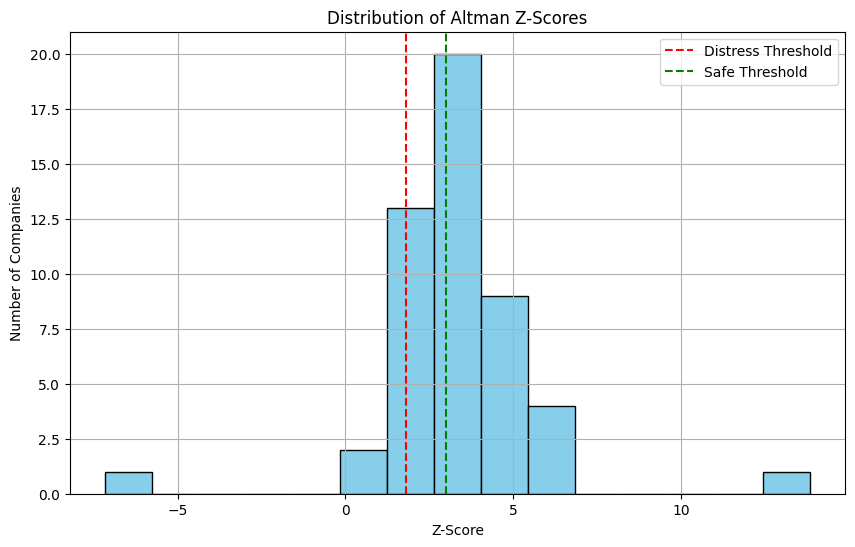

In [ ]:
import matplotlib.pyplot as plt

# Histogram of Z-Scores
plt.figure(figsize=(10, 6))
plt.hist(full_df["Z-Score"], bins=15, edgecolor='black', color='skyblue')
plt.axvline(x=1.8, color='red', linestyle='--', label='Distress Threshold')
plt.axvline(x=3.0, color='green', linestyle='--', label='Safe Threshold')
plt.title("Distribution of Altman Z-Scores")
plt.xlabel("Z-Score")
plt.ylabel("Number of Companies")
plt.legend()
plt.grid(True)
plt.show()


# Step 10 - Scatter Plot: Z-Score vs. Enhanced Score

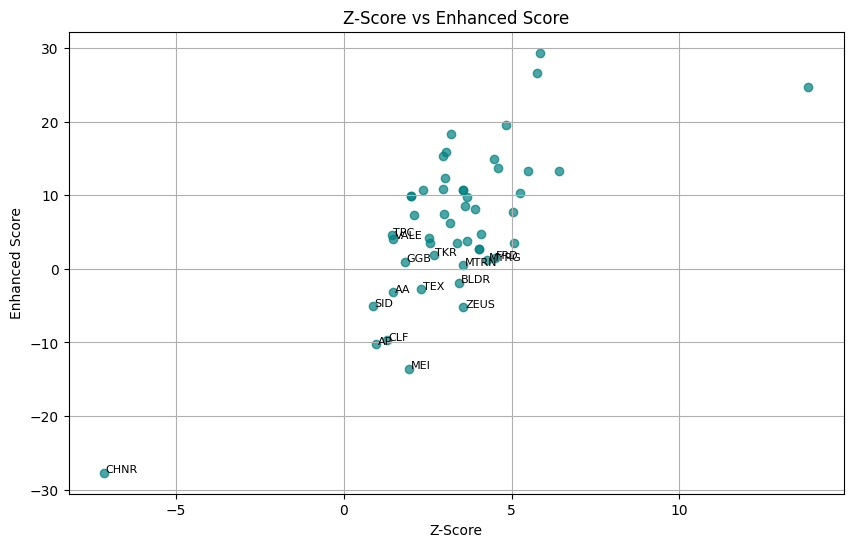

In [ ]:
# Scatter plot comparing Z-Score and Enhanced Score
plt.figure(figsize=(10, 6))
plt.scatter(full_df["Z-Score"], full_df["Enhanced Score"], c='teal', alpha=0.7)
plt.title("Z-Score vs Enhanced Score")
plt.xlabel("Z-Score")
plt.ylabel("Enhanced Score")
plt.grid(True)

# Optional: Add labels to points
for i, row in full_df.iterrows():
    if row["Z-Score"] < 2 or row["Enhanced Score"] < 2:  # Label only outliers
        plt.text(row["Z-Score"] + 0.05, row["Enhanced Score"], row["Ticker"], fontsize=8)

plt.show()
